# Vegetation cover products
A comparison is made between vegetation products based on fPar (Donohue et al., 2008), MODIS and vegmachine.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [3]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

In [4]:
#read in fpar-data Donohue et al

fparv5_howard = np.loadtxt('../../data/fPAR/fpar_howard_v5.txt',delimiter=',', usecols=3 )
fparv5_adelaide = np.loadtxt('../../data/fPAR/fpar_adelaide_v5.txt',delimiter=',', usecols=3 )
fparv5_litch = np.loadtxt('../../data/fPAR/fpar_litchfield_v5.txt',delimiter=',', usecols=3 )
fparv5_daly = np.loadtxt('../../data/fPAR/fpar_daly_v5.txt',delimiter=',', usecols=3 )
fparv5_dry = np.loadtxt('../../data/fPAR/fpar_dry_v5.txt',delimiter=',', usecols=3 )
fparv5_sturt = np.loadtxt('../../data/fPAR/fpar_sturt_v5.txt',delimiter=',', usecols=3 )

fparv5_dates = np.genfromtxt('../../data/fPAR/dates_v5', dtype='str', delimiter=',')
fparv5_dates = pd.to_datetime(fparv5_dates[:,1], format="%Y%m")


In [5]:
#read in fpar MODIS
fpar_modis_howard = np.loadtxt('../../data/MODIS/fpar_howard.txt',delimiter=',', usecols=3 )
fpar_modis_adelaide = np.loadtxt('../../data/MODIS/fpar_adelaide.txt',delimiter=',', usecols=3 )
fpar_modis_daly = np.loadtxt('../../data/MODIS/fpar_daly.txt',delimiter=',', usecols=3 )
fpar_modis_dry = np.loadtxt('../../data/MODIS/fpar_dry.txt',delimiter=',', usecols=3 )
fpar_modis_sturt = np.loadtxt('../../data/MODIS/fpar_sturt.txt',delimiter=',', usecols=3 )

fpar_modis_dates = np.genfromtxt('../../data/MODIS/dates_fpar_modis', dtype='str', delimiter=',')
fpar_modis_dates = pd.to_datetime(fpar_modis_dates, format="%Y.%m.%d")


In [6]:
#read in evi MODIS
evi_modis_howard = np.loadtxt('../../data/MODIS/evi_howard.txt')
evi_modis_adelaide = np.loadtxt('../../data/MODIS/evi_adelaide.txt' )
evi_modis_daly = np.loadtxt('../../data/MODIS/evi_daly.txt')
evi_modis_dry = np.loadtxt('../../data/MODIS/evi_dry.txt' )
evi_modis_sturt = np.loadtxt('../../data/MODIS/evi_sturt.txt')

evi_modis_dates = np.genfromtxt('../../data/MODIS/dates_modis', dtype='str', delimiter=',')
evi_modis_dates = pd.to_datetime(evi_modis_dates, format="%Y.%m.%d")


In [7]:
#read in pc vegmachine
#bare_mean,green_mean,non_green_mean
vegmachine_howard =  pd.read_csv('../../data/vegmachine/howardsprings.csv', header=0, index_col=0)
vegmachine_adelaide =  pd.read_csv('../../data/vegmachine/adelaideriver.csv', header=0, index_col=0)
vegmachine_daly =  pd.read_csv('../../data/vegmachine/dalyuncleared.csv', header=0, index_col=0)
vegmachine_dry = pd.read_csv('../../data/vegmachine/dryriver.csv' , header=0, index_col=0)
vegmachine_sturt =  pd.read_csv('../../data/vegmachine/sturtplains.csv', header=0, index_col=0)
vegmachine_litch =  pd.read_csv('../../data/vegmachine/litchfield.csv', header=0, index_col=0)

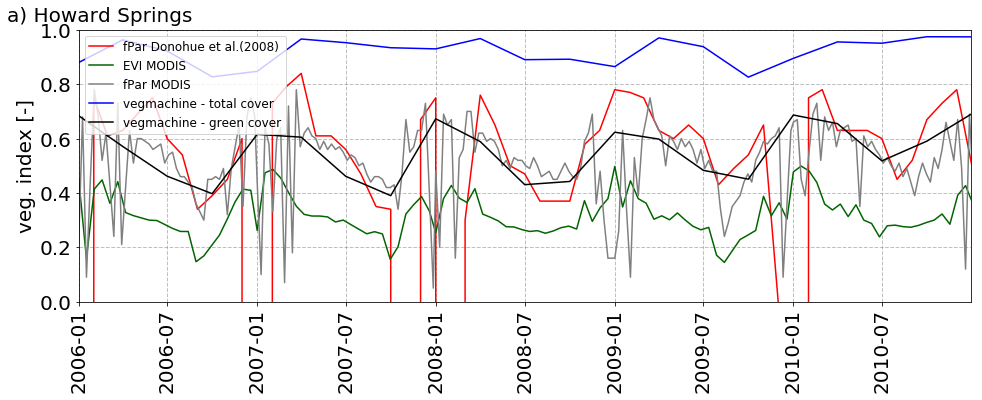

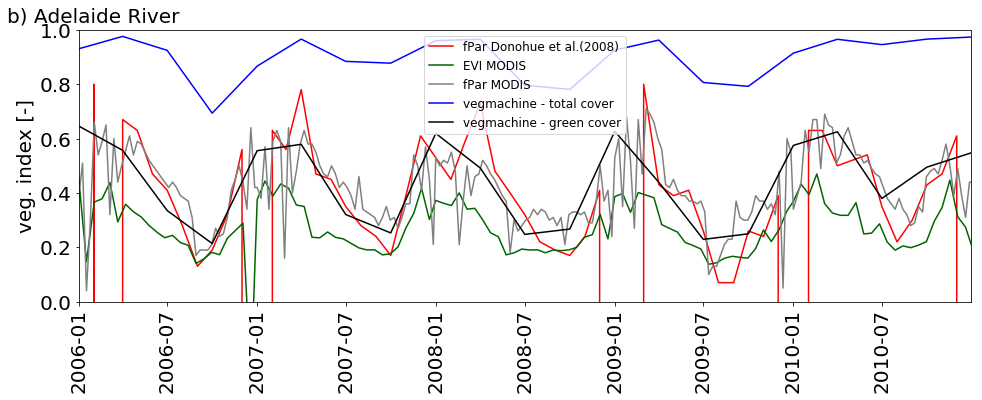

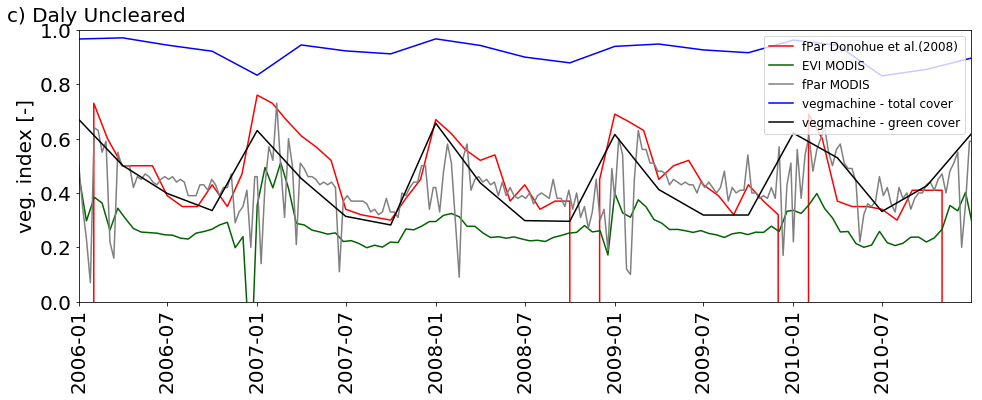

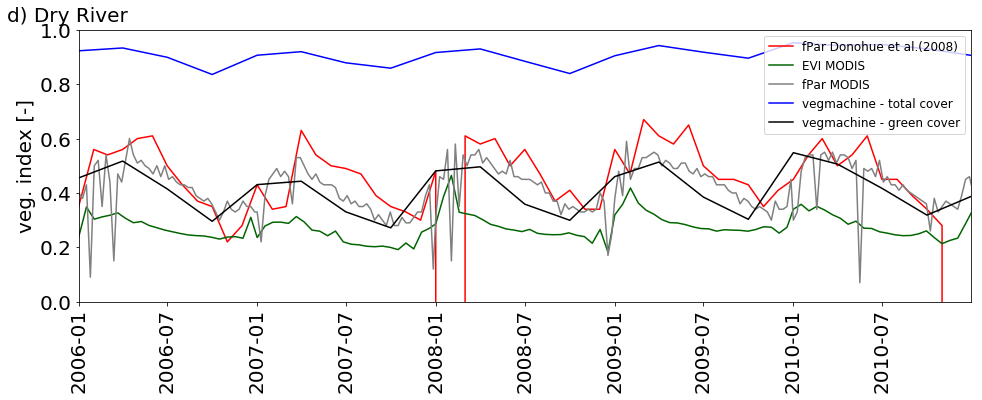

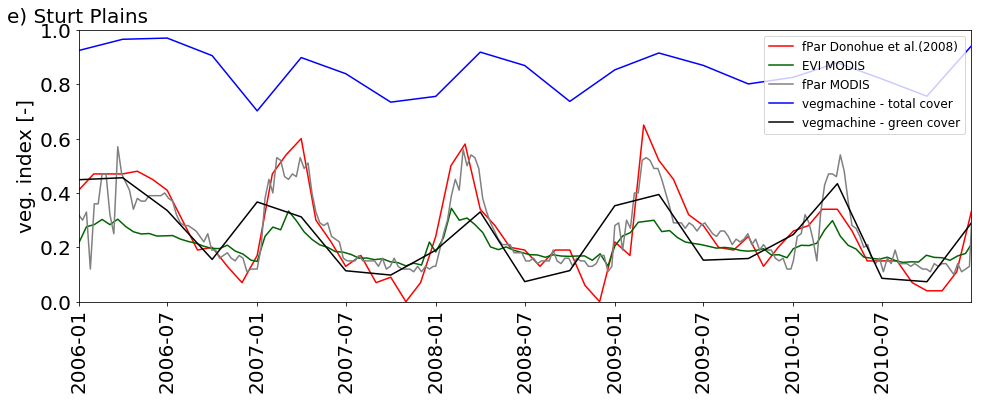

In [11]:
#howardsprings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))    
ax.plot(fparv5_dates, fparv5_howard, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_howard*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_howard/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_howard.index, format="%Y-%m")[np.isfinite(vegmachine_howard["green_mean"])], ((vegmachine_howard["green_mean"]+vegmachine_howard["non_green_mean"])/100)[np.isfinite(vegmachine_howard["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_howard.index, format="%Y-%m")[np.isfinite(vegmachine_howard["green_mean"])], ((vegmachine_howard["green_mean"])/100)[np.isfinite(vegmachine_howard["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_rotation(90)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)   
ax.set_ylim([0,1])
ax.text(-0.08, 1.05, "a) Howard Springs", ha='left', va='center', fontsize=20, transform=ax.transAxes)
plt.legend(fontsize=12)

#AdelaideRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_adelaide, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_adelaide*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_adelaide/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_adelaide.index, format="%Y-%m")[np.isfinite(vegmachine_adelaide["green_mean"])], ((vegmachine_adelaide["green_mean"]+vegmachine_adelaide["non_green_mean"])/100)[np.isfinite(vegmachine_adelaide["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_adelaide.index, format="%Y-%m")[np.isfinite(vegmachine_adelaide["green_mean"])], ((vegmachine_adelaide["green_mean"])/100)[np.isfinite(vegmachine_adelaide["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_rotation(90)
ax.set_ylim([0,1])
ax.text(-0.08, 1.05, "b) Adelaide River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)


#DalyUncleared
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_daly, color="red", label="fPar Donohue et al.(2008)")
ax.set_ylabel("veg. index [-]", fontsize=20)
ax.plot(evi_modis_dates, evi_modis_daly*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_daly/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_daly.index, format="%Y-%m")[np.isfinite(vegmachine_daly["green_mean"])], ((vegmachine_daly["green_mean"]+vegmachine_daly["non_green_mean"])/100)[np.isfinite(vegmachine_daly["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_daly.index, format="%Y-%m")[np.isfinite(vegmachine_daly["green_mean"])], ((vegmachine_daly["green_mean"])/100)[np.isfinite(vegmachine_daly["green_mean"])], color="black", label="vegmachine - green cover")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_rotation(90)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2007,1, 1), datetime( 2011 ,12, 31)]) 
ax.text(-0.08, 1.05, "c) Daly Uncleared", ha='left', va='center', fontsize=20, transform=ax.transAxes)

plt.legend(fontsize=12)

#DryRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_dry, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_dry*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_dry/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_dry.index, format="%Y-%m")[np.isfinite(vegmachine_dry["green_mean"])], ((vegmachine_dry["green_mean"]+vegmachine_dry["non_green_mean"])/100)[np.isfinite(vegmachine_dry["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_dry.index, format="%Y-%m")[np.isfinite(vegmachine_dry["green_mean"])], ((vegmachine_dry["green_mean"])/100)[np.isfinite(vegmachine_dry["green_mean"])], color="black", label="vegmachine - green cover")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_rotation(90)
ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
ax.text(-0.08, 1.05, "d) Dry River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)

#SturtPlains
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_sturt, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_sturt*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_sturt/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_sturt.index, format="%Y-%m")[np.isfinite(vegmachine_sturt["green_mean"])], ((vegmachine_sturt["green_mean"]+vegmachine_sturt["non_green_mean"])/100)[np.isfinite(vegmachine_sturt["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_sturt.index, format="%Y-%m")[np.isfinite(vegmachine_sturt["green_mean"])], ((vegmachine_sturt["green_mean"])/100)[np.isfinite(vegmachine_sturt["green_mean"])], color="black", label="vegmachine - green cover")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_rotation(90)
ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
ax.text(-0.08, 1.05, "e) Sturt Plains", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()


**Figure S13.1.** Timeseries of vegetation cover bsaed on the different products of fPar (Donohue et al, 2008) in red, EVI MODIS (green), fPar MODIS (gray), vegmachine total vegetation cover (blue) and vegmachine green cover (black), for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. 